In [3]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import gamma
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

data = pd.read_csv(r"D:\DL_Homework\Kaggle2_Titanic\统计建模\数据\空值填补后数据集.csv", encoding='gb18030')
data.columns

Index(['date', 'AQI指数', 'PM2.5', 'PM10', 'O3', 'no2', 'so2', 'co', 'T', 'Po',
       'U', 'Ff', 'VV', 'RRR'],
      dtype='object')

In [11]:
# 描述性统计信息
desc_stats = data.describe()
print(desc_stats)
desc_stats.to_csv("数据分析/desc_stats.csv")

             AQI指数        PM2.5         PM10           O3          no2  \
count  2897.000000  2897.000000  2897.000000  2897.000000  2897.000000   
mean     53.210217    79.115292    39.263721    38.925440    11.611322   
std      18.099107    30.373660    17.116824    16.669789     5.540171   
min      17.000000    11.000000     8.000000     5.000000     1.000000   
25%      40.000000    57.000000    26.000000    28.000000     7.000000   
50%      51.000000    74.000000    37.000000    36.000000    11.000000   
75%      64.000000    98.000000    51.000000    47.000000    15.000000   
max     140.000000   191.000000   130.000000   220.000000    47.000000   

               so2           co            T           Po            U  \
count  2897.000000  2897.000000  2897.000000  2897.000000  2897.000000   
mean      5.588195     6.282361    17.433069   607.518053    63.478771   
std       2.594866     2.989220     5.015220     2.524476    19.987815   
min       1.000000     1.000000    -3

In [10]:
# 计算特征之间的相关系数
corr_matrix = data.corr()
print(corr_matrix)
corr_matrix.to_csv("数据分析/corr_matrix.csv")

          AQI指数     PM2.5      PM10        O3       no2       so2        co  \
AQI指数  1.000000  0.594287  0.536697  0.536025  0.233359  0.218769  0.257883   
PM2.5  0.594287  1.000000  0.673285  0.343994  0.392183  0.342005  0.475791   
PM10   0.536697  0.673285  1.000000  0.465272  0.652948  0.591663  0.616449   
O3     0.536025  0.343994  0.465272  1.000000  0.150227  0.169915  0.086475   
no2    0.233359  0.392183  0.652948  0.150227  1.000000  0.565474  0.570953   
so2    0.218769  0.342005  0.591663  0.169915  0.565474  1.000000  0.613976   
co     0.257883  0.475791  0.616449  0.086475  0.570953  0.613976  1.000000   
T      0.014707 -0.201377 -0.113403  0.210984 -0.224070 -0.081937 -0.202923   
Po    -0.045193  0.103476  0.037955 -0.189812  0.214582  0.007919  0.075869   
U     -0.408869 -0.274114 -0.229746 -0.370817  0.140734  0.000507 -0.022277   
Ff     0.188248  0.095428  0.093063  0.178839 -0.154271  0.028999  0.051907   
VV    -0.141847 -0.313223 -0.218796 -0.006993 -0.238

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22644\339249852.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


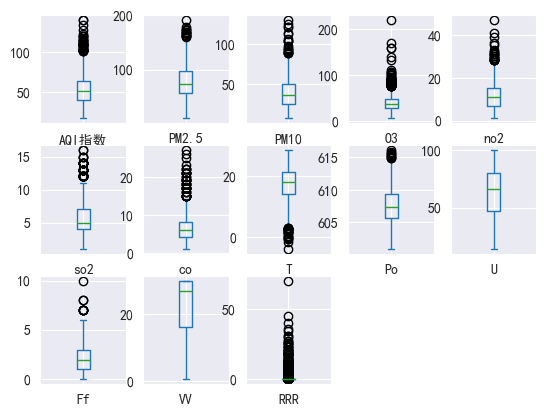

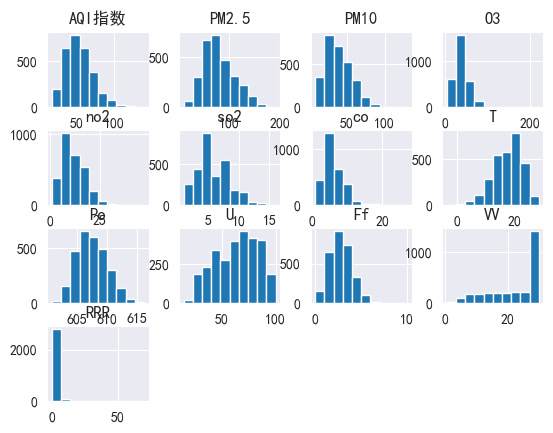

In [13]:
# 绘制箱线图
data.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

# 绘制直方图
data.hist()
plt.show()

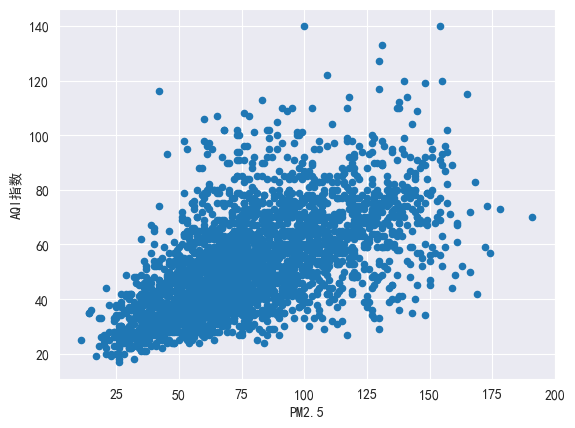

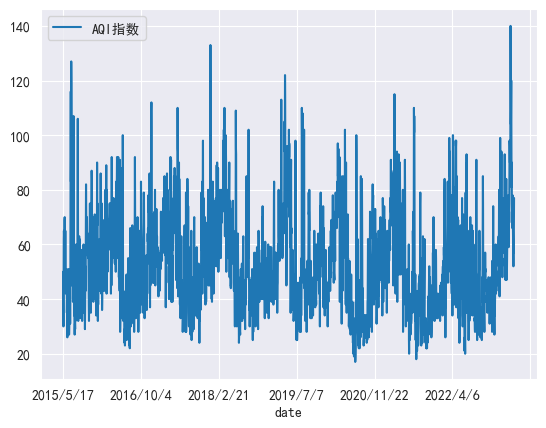

In [14]:
# 绘制散点图
data.plot(x='PM2.5', y='AQI指数', kind='scatter')
plt.show()

# 绘制折线图
data.plot(x='date', y='AQI指数', kind='line')
plt.show()

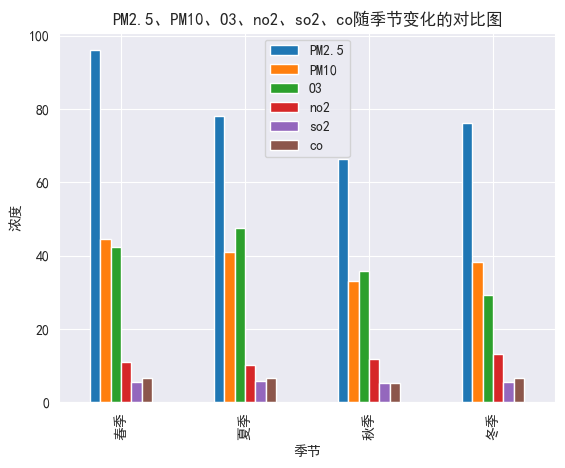

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"D:\DL_Homework\Kaggle2_Titanic\统计建模\数据\data-1.csv", encoding='gb18030')
data['date'] = pd.to_datetime(data['date'])
# data.set_index('date', inplace=True)
 # 添加季节列
data['季节'] = pd.cut(data['date'].dt.month, bins=[0, 3, 6, 9, 12], labels=['春季', '夏季', '秋季', '冬季'])
 # 选择要绘制的列
cols_to_plot = ['PM2.5', 'PM10', 'O3', 'no2', 'so2', 'co']
 # 按季节分组并计算平均值
grouped_data = data.groupby('季节')[cols_to_plot].mean()
 # 绘制对比图
grouped_data.plot(kind='bar')
plt.title('PM2.5、PM10、O3、no2、so2、co随季节变化的对比图')
plt.xlabel('季节')
plt.ylabel('浓度')
plt.show()

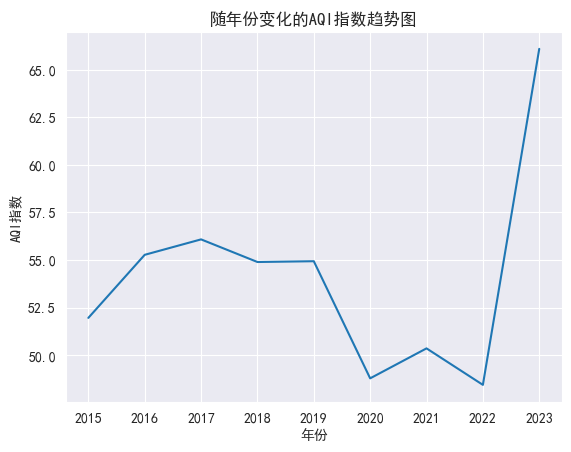

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv(r"D:\DL_Homework\Kaggle2_Titanic\统计建模\数据\data-1.csv", encoding='gb18030')

# 将日期列转换为时间序列
df['date'] = pd.to_datetime(df['date'])

# 提取年份信息
df['year'] = df['date'].dt.year

# 按年份分组并计算AQI指数的平均值
aqi_by_year = df.groupby('year')['AQI指数'].mean()

# 绘制折线图
plt.plot(aqi_by_year.index, aqi_by_year.values)

# 添加标题、标签等
plt.title('随年份变化的AQI指数趋势图')
plt.xlabel('年份')
plt.ylabel('AQI指数')

# 显示图形
plt.show()


ValueError: x and y must have same first dimension, but have shapes (4,) and (2,)

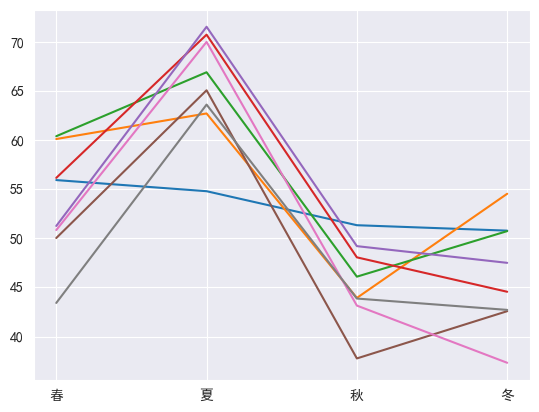

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv(r"D:\DL_Homework\Kaggle2_Titanic\统计建模\数据\data-1.csv", encoding='gb18030')

# 将日期列转换为时间序列
df['date'] = pd.to_datetime(df['date'])

# 提取年份和季节信息
df['year'] = df['date'].dt.year
df['season'] = (df['date'].dt.month % 12 + 3) // 3

# 按年份和季节分组并计算AQI指数的平均值
aqi_by_season = df.groupby(['year', 'season'])['AQI指数'].mean()

# 绘制折线图
fig, ax = plt.subplots()
for year in aqi_by_season.index.levels[0]:
    x = ['春', '夏', '秋', '冬']
    y = aqi_by_season.loc[year].values.tolist()
    ax.plot(x, y, label=str(year))

# 添加标题、标签等
ax.set_title('不同年份AQI随季节变化图')
ax.set_xlabel('季节')
ax.set_ylabel('AQI指数')
ax.set_xticklabels(['春', '夏', '秋', '冬'])
ax.legend(title='年份')

# 显示图形
plt.show()



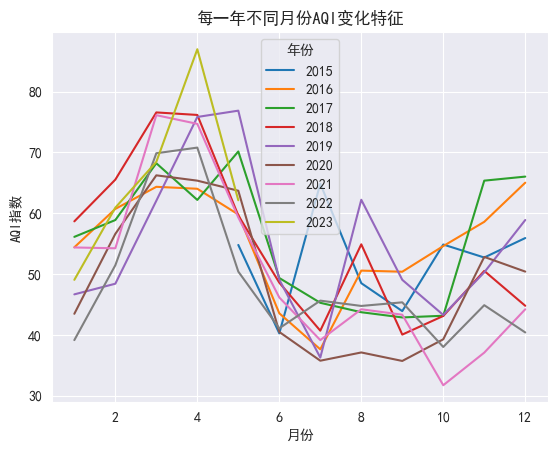

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv(r"D:\DL_Homework\Kaggle2_Titanic\统计建模\数据\data-1.csv", encoding='gb18030')

# 将日期列转换为时间序列
df['date'] = pd.to_datetime(df['date'])

# 提取年份和月份信息
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# 按年份和月份分组并计算AQI指数的平均值
aqi_by_month = df.groupby(['year', 'month'])['AQI指数'].mean()

# 绘制折线图
for year in aqi_by_month.index.levels[0]:
    plt.plot(aqi_by_month.loc[year].index, aqi_by_month.loc[year].values, label=str(year))

# 添加标题、标签等
plt.title('每一年不同月份AQI变化特征')
plt.xlabel('月份')
plt.ylabel('AQI指数')
plt.legend(title='年份')

# 显示图形
plt.show()


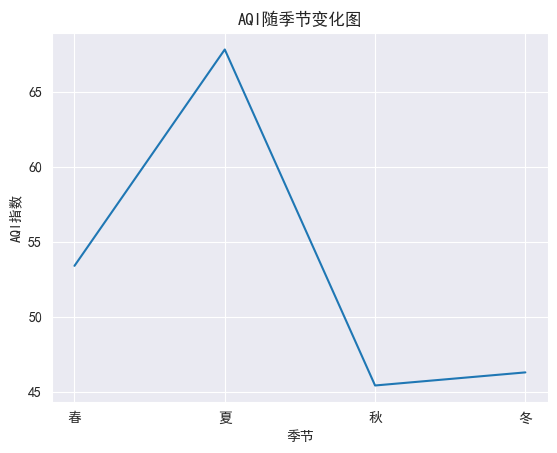

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
 # 对数据进行预处理
data['date'] = pd.to_datetime(data['date'])
data['season'] = (data['date'].dt.month % 12 + 3) // 3
data = data[['season', 'AQI指数']]
data_mean = data.groupby('season').mean()
 # 画图
x = ['春', '夏', '秋', '冬']
y = data_mean.values.reshape(4, ).tolist()
plt.plot(x, y)
plt.title('AQI随季节变化图')
plt.xlabel('季节')
plt.ylabel('AQI指数')
plt.show()

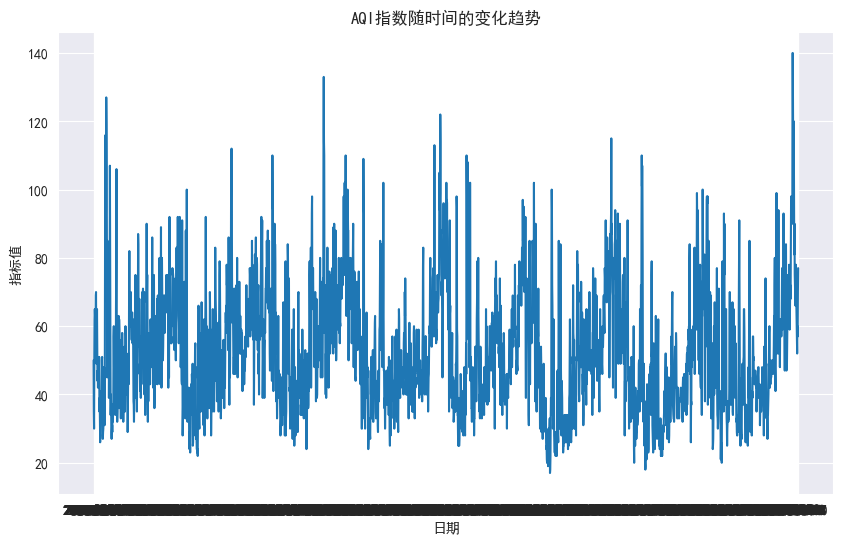

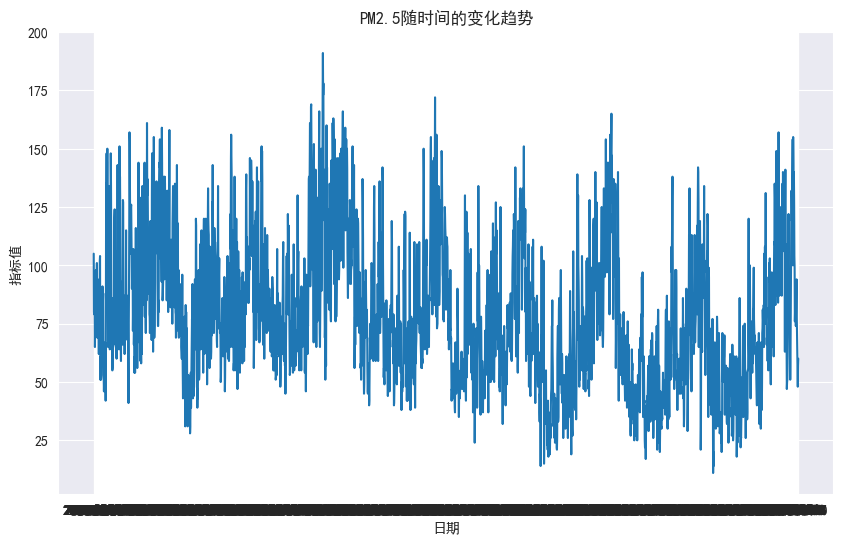


KeyboardInterrupt



In [11]:
for col in data.columns[1:]:
    # 设置图形大小
    plt.figure(figsize=(10,6))
    # 绘制折线图
    plt.plot(data['date'], data[col])
    # 添加标题、坐标轴标签等
    plt.title(col + '随时间的变化趋势')
    plt.xlabel('日期')
    plt.ylabel('指标值')
    # 显示图形
    plt.show()

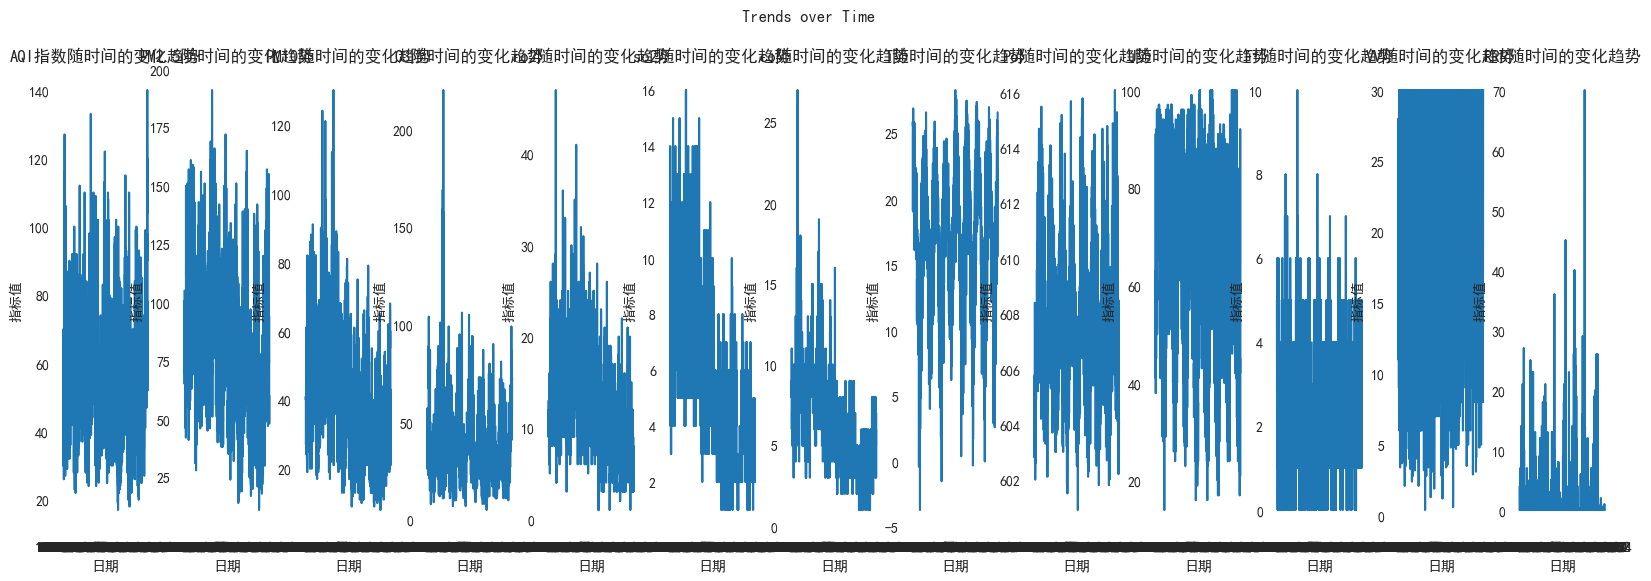

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
 # assume your data is stored in a pandas dataframe called 'data'
fig, axs = plt.subplots(nrows=1, ncols=len(data.columns[1:]), figsize=(20,6), sharex='col')
fig.suptitle('Trends over Time')
 # loop through each column in the dataframe (except the first one)
for i, col in enumerate(data.columns[1:]):
    # plot the data for the current column
    axs[i].plot(data['date'], data[col])
     # set x-axis ticks to only show year-month format
    axs[i].xaxis.set_major_locator(mdates.MonthLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
     # add title, and axis labels for each subplot
    axs[i].set_title(col + '随时间的变化趋势')
    axs[i].set_xlabel('日期')
    axs[i].set_ylabel('指标值')
 # adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)
 # display the plot
plt.show()

IndexError: index 6 is out of bounds for axis 1 with size 6

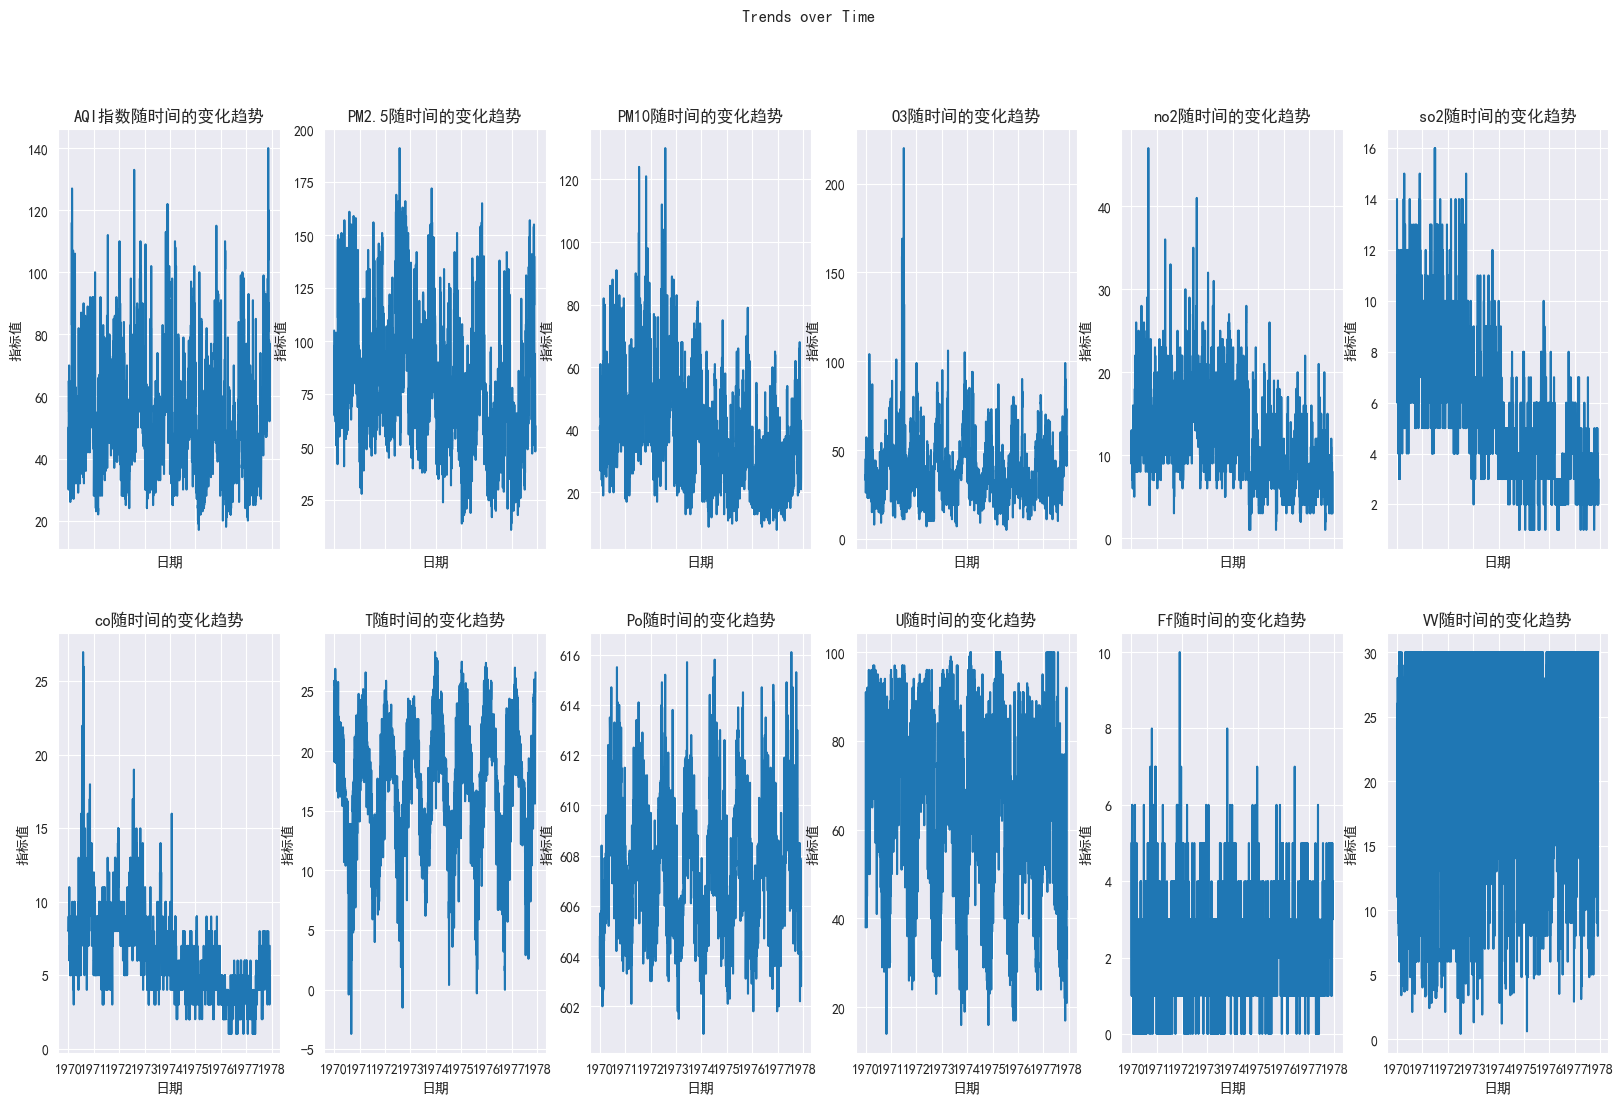

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
 # assume your data is stored in a pandas dataframe called 'data'
fig, axs = plt.subplots(nrows=2, ncols=len(data.columns[1:])//2, figsize=(20,12), sharex='col')
fig.suptitle('Trends over Time')
 # loop through each column in the dataframe (except the first one)
for i, col in enumerate(data.columns[1:]):
    # plot the data for the current column
    if i < len(data.columns[1:])//2: #first row of subplots
        axs[0,i].plot(data['date'], data[col])
        # set x-axis ticks to only show year format
        axs[0,i].xaxis.set_major_locator(mdates.YearLocator())
        axs[0,i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        # add title, and axis labels for each subplot
        axs[0,i].set_title(col + '随时间的变化趋势')
        axs[0,i].set_xlabel('日期')
        axs[0,i].set_ylabel('指标值')
    else: #second row of subplots
        axs[1,i-len(data.columns[1:])//2].plot(data['date'], data[col])
        # set x-axis ticks to only show year format
        axs[1,i-len(data.columns[1:])//2].xaxis.set_major_locator(mdates.YearLocator())
        axs[1,i-len(data.columns[1:])//2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        # add title, and axis labels for each subplot
        axs[1,i-len(data.columns[1:])//2].set_title(col + '随时间的变化趋势')
        axs[1,i-len(data.columns[1:])//2].set_xlabel('日期')
        axs[1,i-len(data.columns[1:])//2].set_ylabel('指标值')
 # adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)
 # display the plot
plt.show()


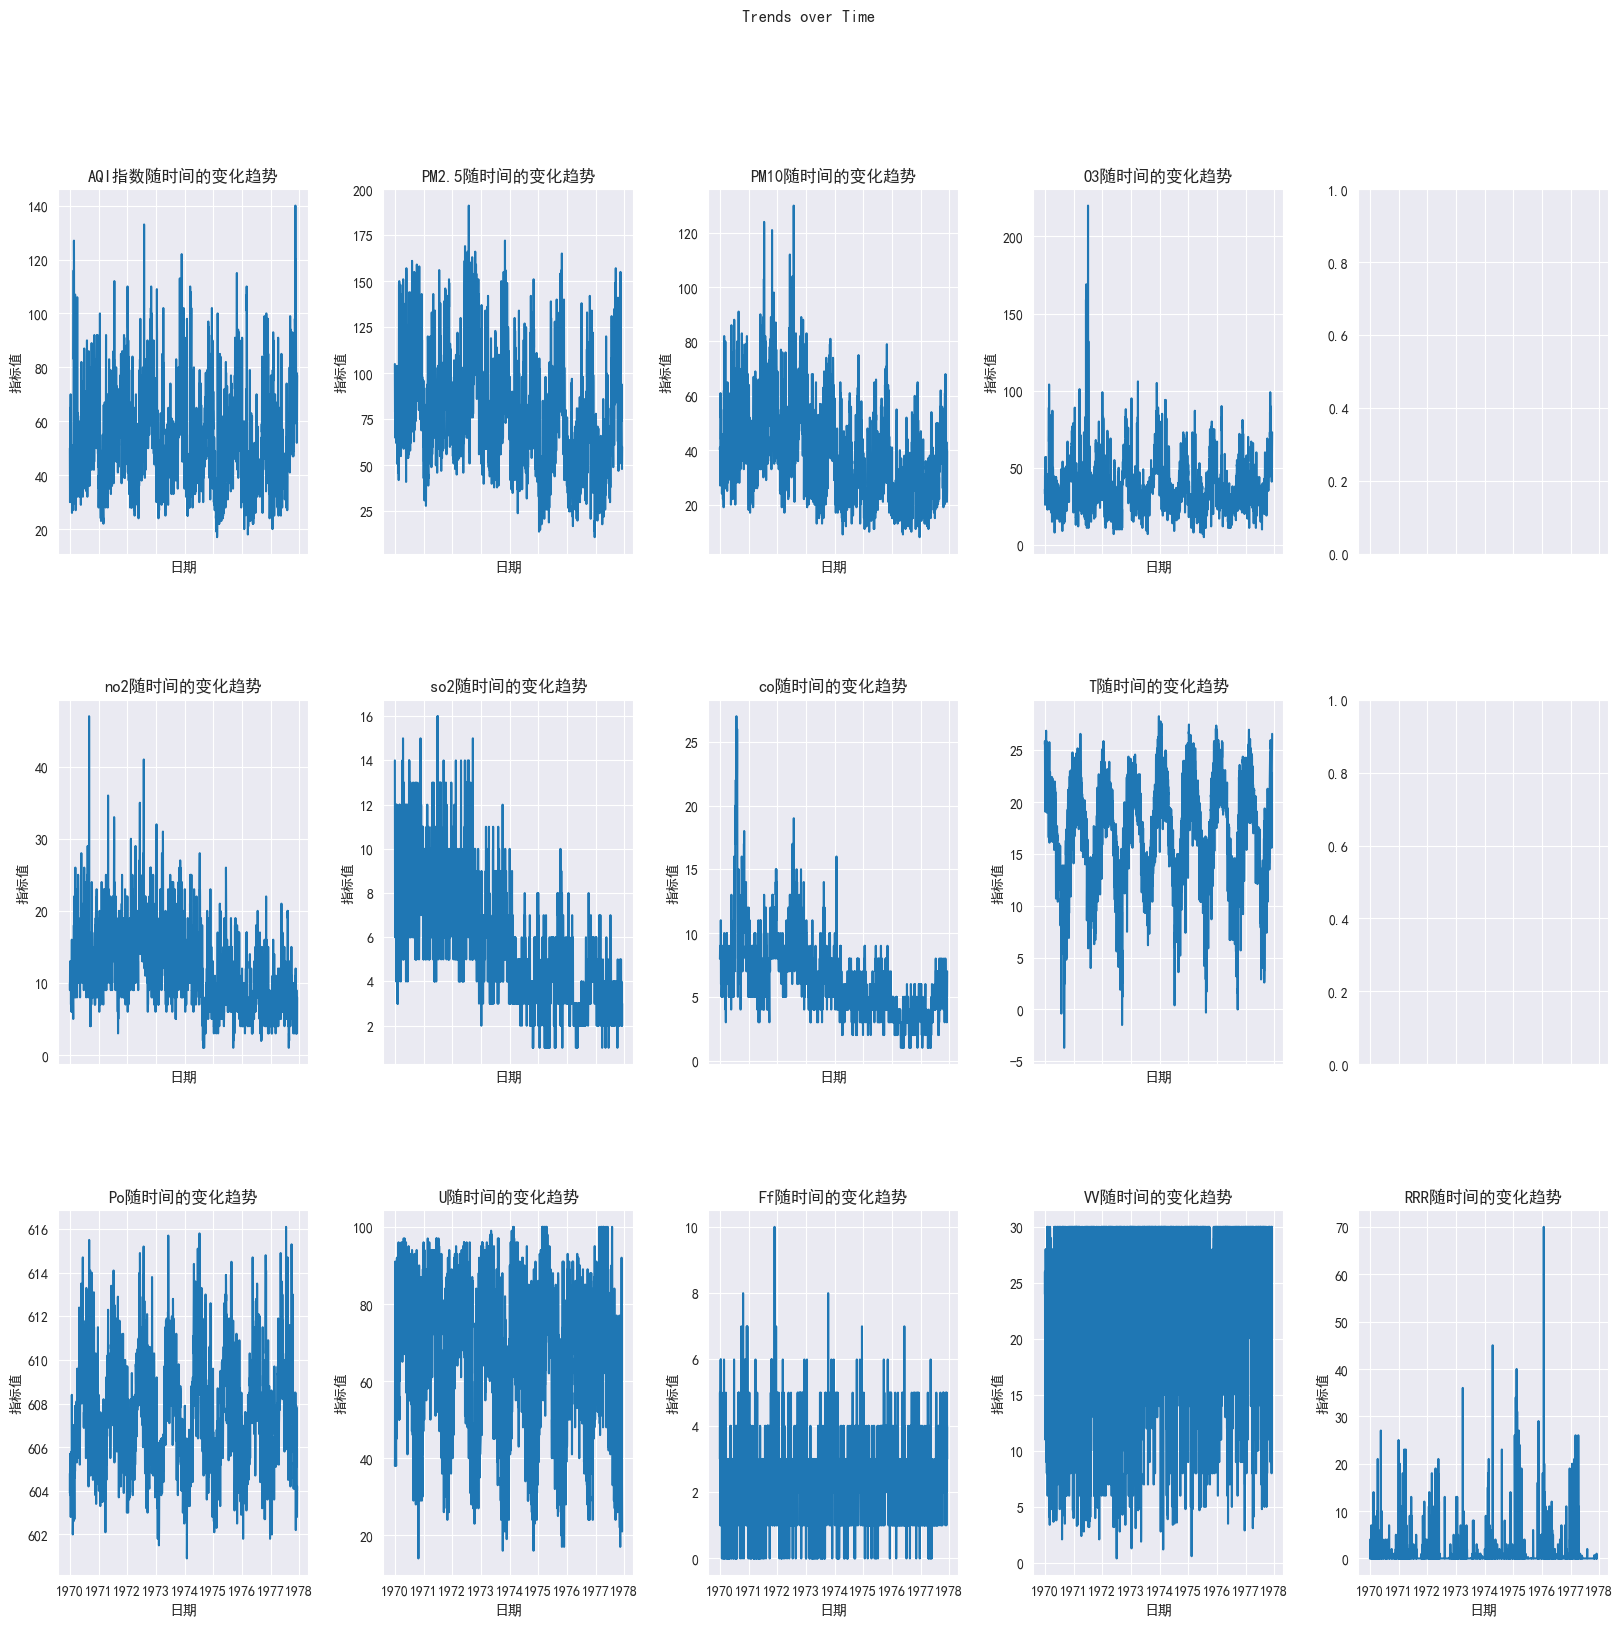

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
  # assume your data is stored in a pandas dataframe called 'data'
fig, axs = plt.subplots(nrows=3, ncols=len(data.columns[1:])//3+1, figsize=(20,18), sharex='col')
fig.suptitle('Trends over Time')
  # loop through each column in the dataframe (except the first one)
for i, col in enumerate(data.columns[1:]):
    # plot the data for the current column
    if i < len(data.columns[1:])//3: #first row of subplots
        axs[0,i].plot(data['date'], data[col])
        # set x-axis ticks to only show year format
        axs[0,i].xaxis.set_major_locator(mdates.YearLocator())
        axs[0,i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        # add title, and axis labels for each subplot
        axs[0,i].set_title(col + '随时间的变化趋势')
        axs[0,i].set_xlabel('日期')
        axs[0,i].set_ylabel('指标值')
    elif i < len(data.columns[1:])//3*2: #second row of subplots
        axs[1,i-len(data.columns[1:])//3].plot(data['date'], data[col])
        # set x-axis ticks to only show year format
        axs[1,i-len(data.columns[1:])//3].xaxis.set_major_locator(mdates.YearLocator())
        axs[1,i-len(data.columns[1:])//3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        # add title, and axis labels for each subplot
        axs[1,i-len(data.columns[1:])//3].set_title(col + '随时间的变化趋势')
        axs[1,i-len(data.columns[1:])//3].set_xlabel('日期')
        axs[1,i-len(data.columns[1:])//3].set_ylabel('指标值')
    else: #third row of subplots
        axs[2,i-len(data.columns[1:])//3*2].plot(data['date'], data[col])
        # set x-axis ticks to only show year format
        axs[2,i-len(data.columns[1:])//3*2].xaxis.set_major_locator(mdates.YearLocator())
        axs[2,i-len(data.columns[1:])//3*2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        # add title, and axis labels for each subplot
        axs[2,i-len(data.columns[1:])//3*2].set_title(col + '随时间的变化趋势')
        axs[2,i-len(data.columns[1:])//3*2].set_xlabel('日期')
        axs[2,i-len(data.columns[1:])//3*2].set_ylabel('指标值')
  # adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)
 # display the plot
plt.show()

数据集条目数: 2897
数据集特征数: 14
数据类型信息:
 date      object
AQI指数      int64
PM2.5      int64
PM10       int64
O3         int64
no2        int64
so2        int64
co         int64
T        float64
Po       float64
U          int64
Ff         int64
VV       float64
RRR      float64
dtype: object


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17196\345216020.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


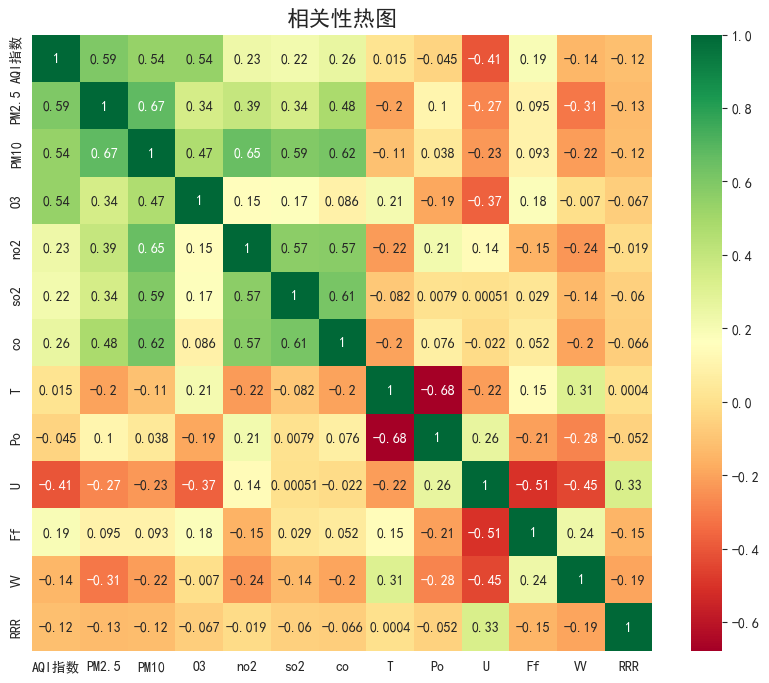

In [5]:
df = data
# 数据概况
print('数据集条目数:', df.shape[0])
print('数据集特征数:', df.shape[1])
print('数据类型信息:\n', df.dtypes)

# 缺失值分析
missing_values = df.isnull().sum()
missing_values_percent = 100 * missing_values / len(df)
missing_data = pd.concat([missing_values, missing_values_percent], axis=1)
# missing_data.columns = ['缺失值数量', '缺失值比例']
# print('特征缺失值情况:\n', missing_data)

# 相关性分析
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
plt.title('相关性热图', fontsize=16, fontweight='bold')
plt.show()

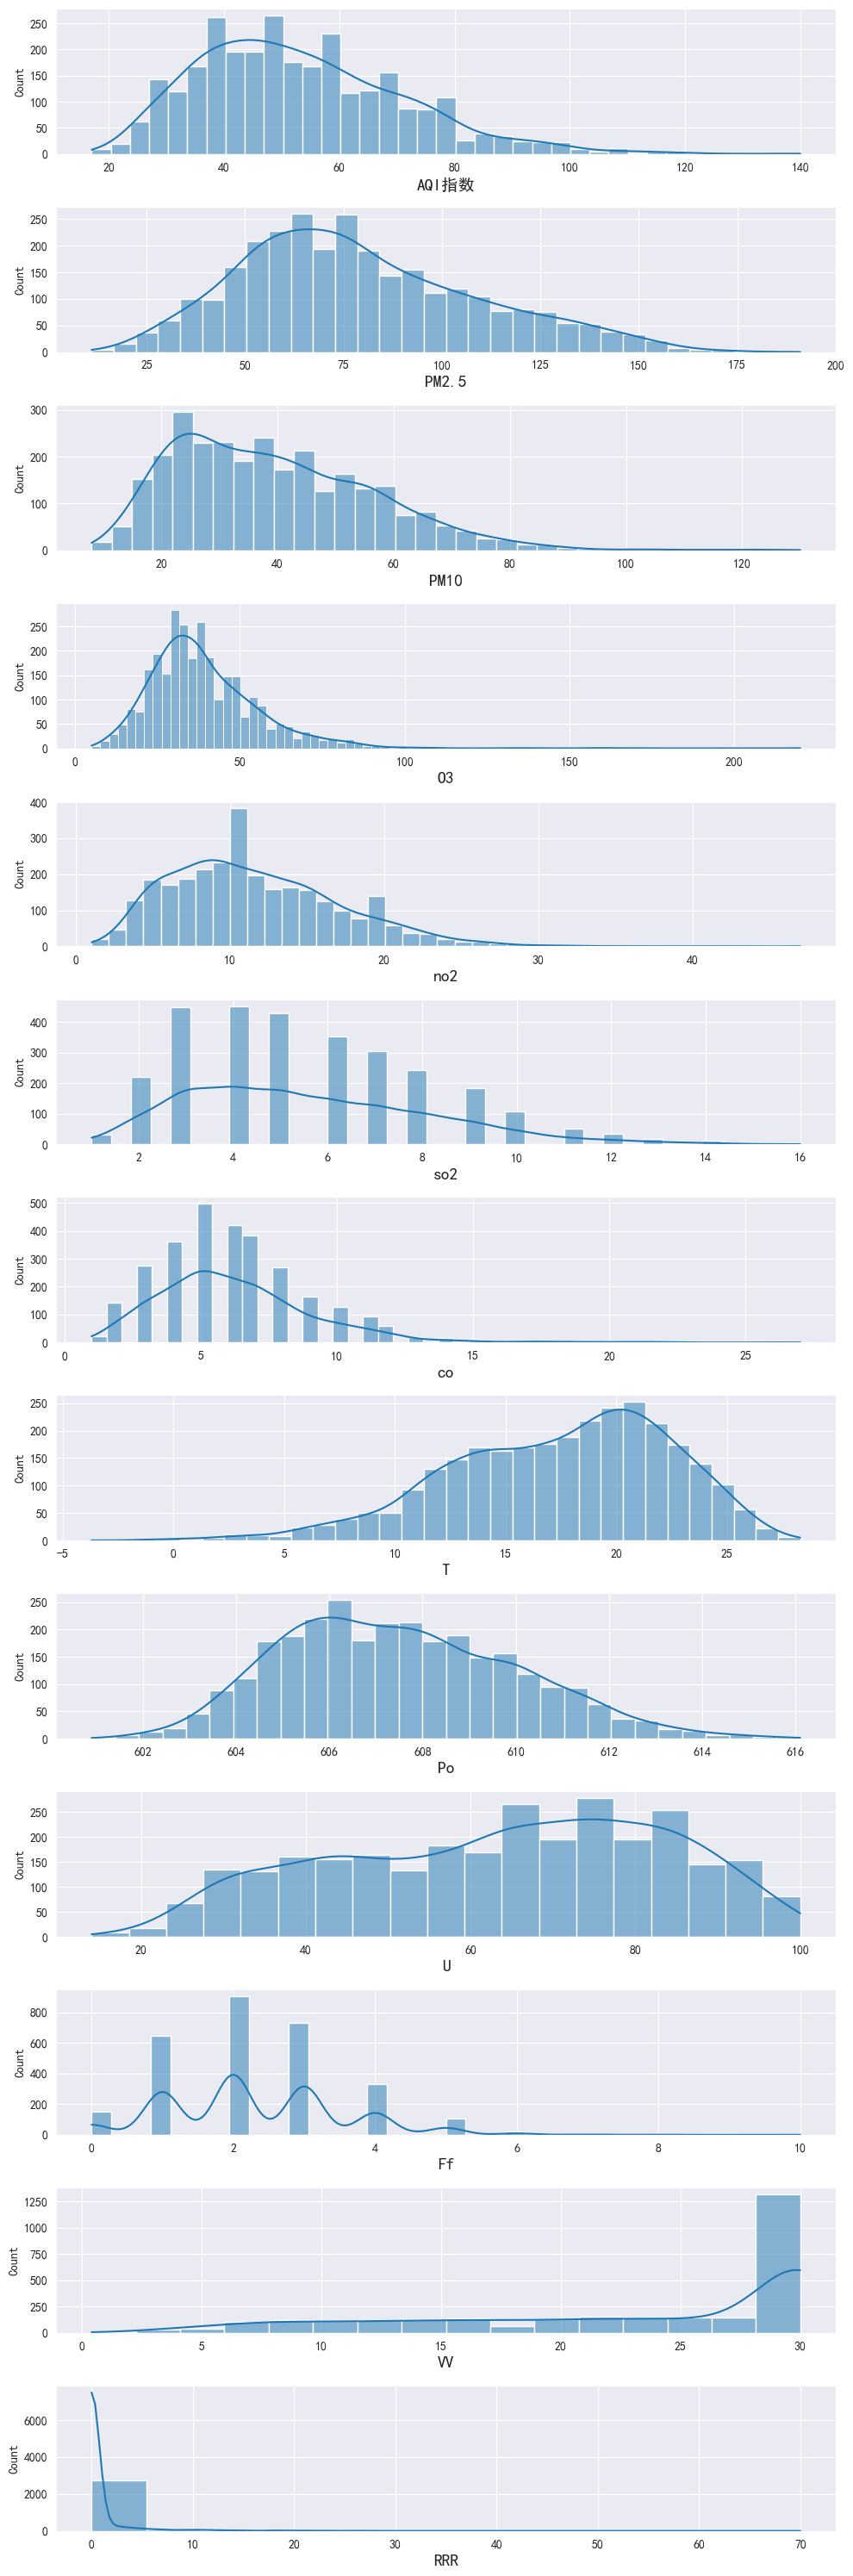

In [24]:
# 创建一个列表，存储数值型特征的列名
numeric_cols = ['AQI指数', 'PM2.5', 'PM10', 'O3', 'no2', 'so2', 'co', 'T', 'Po',
       'U', 'Ff', 'VV', 'RRR']

# 绘制每列特征的直方图和核密度估计图
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 30))
for i, col in enumerate(numeric_cols):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i])
    axes[i].set_xlabel(col, fontsize=14)

plt.tight_layout()
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

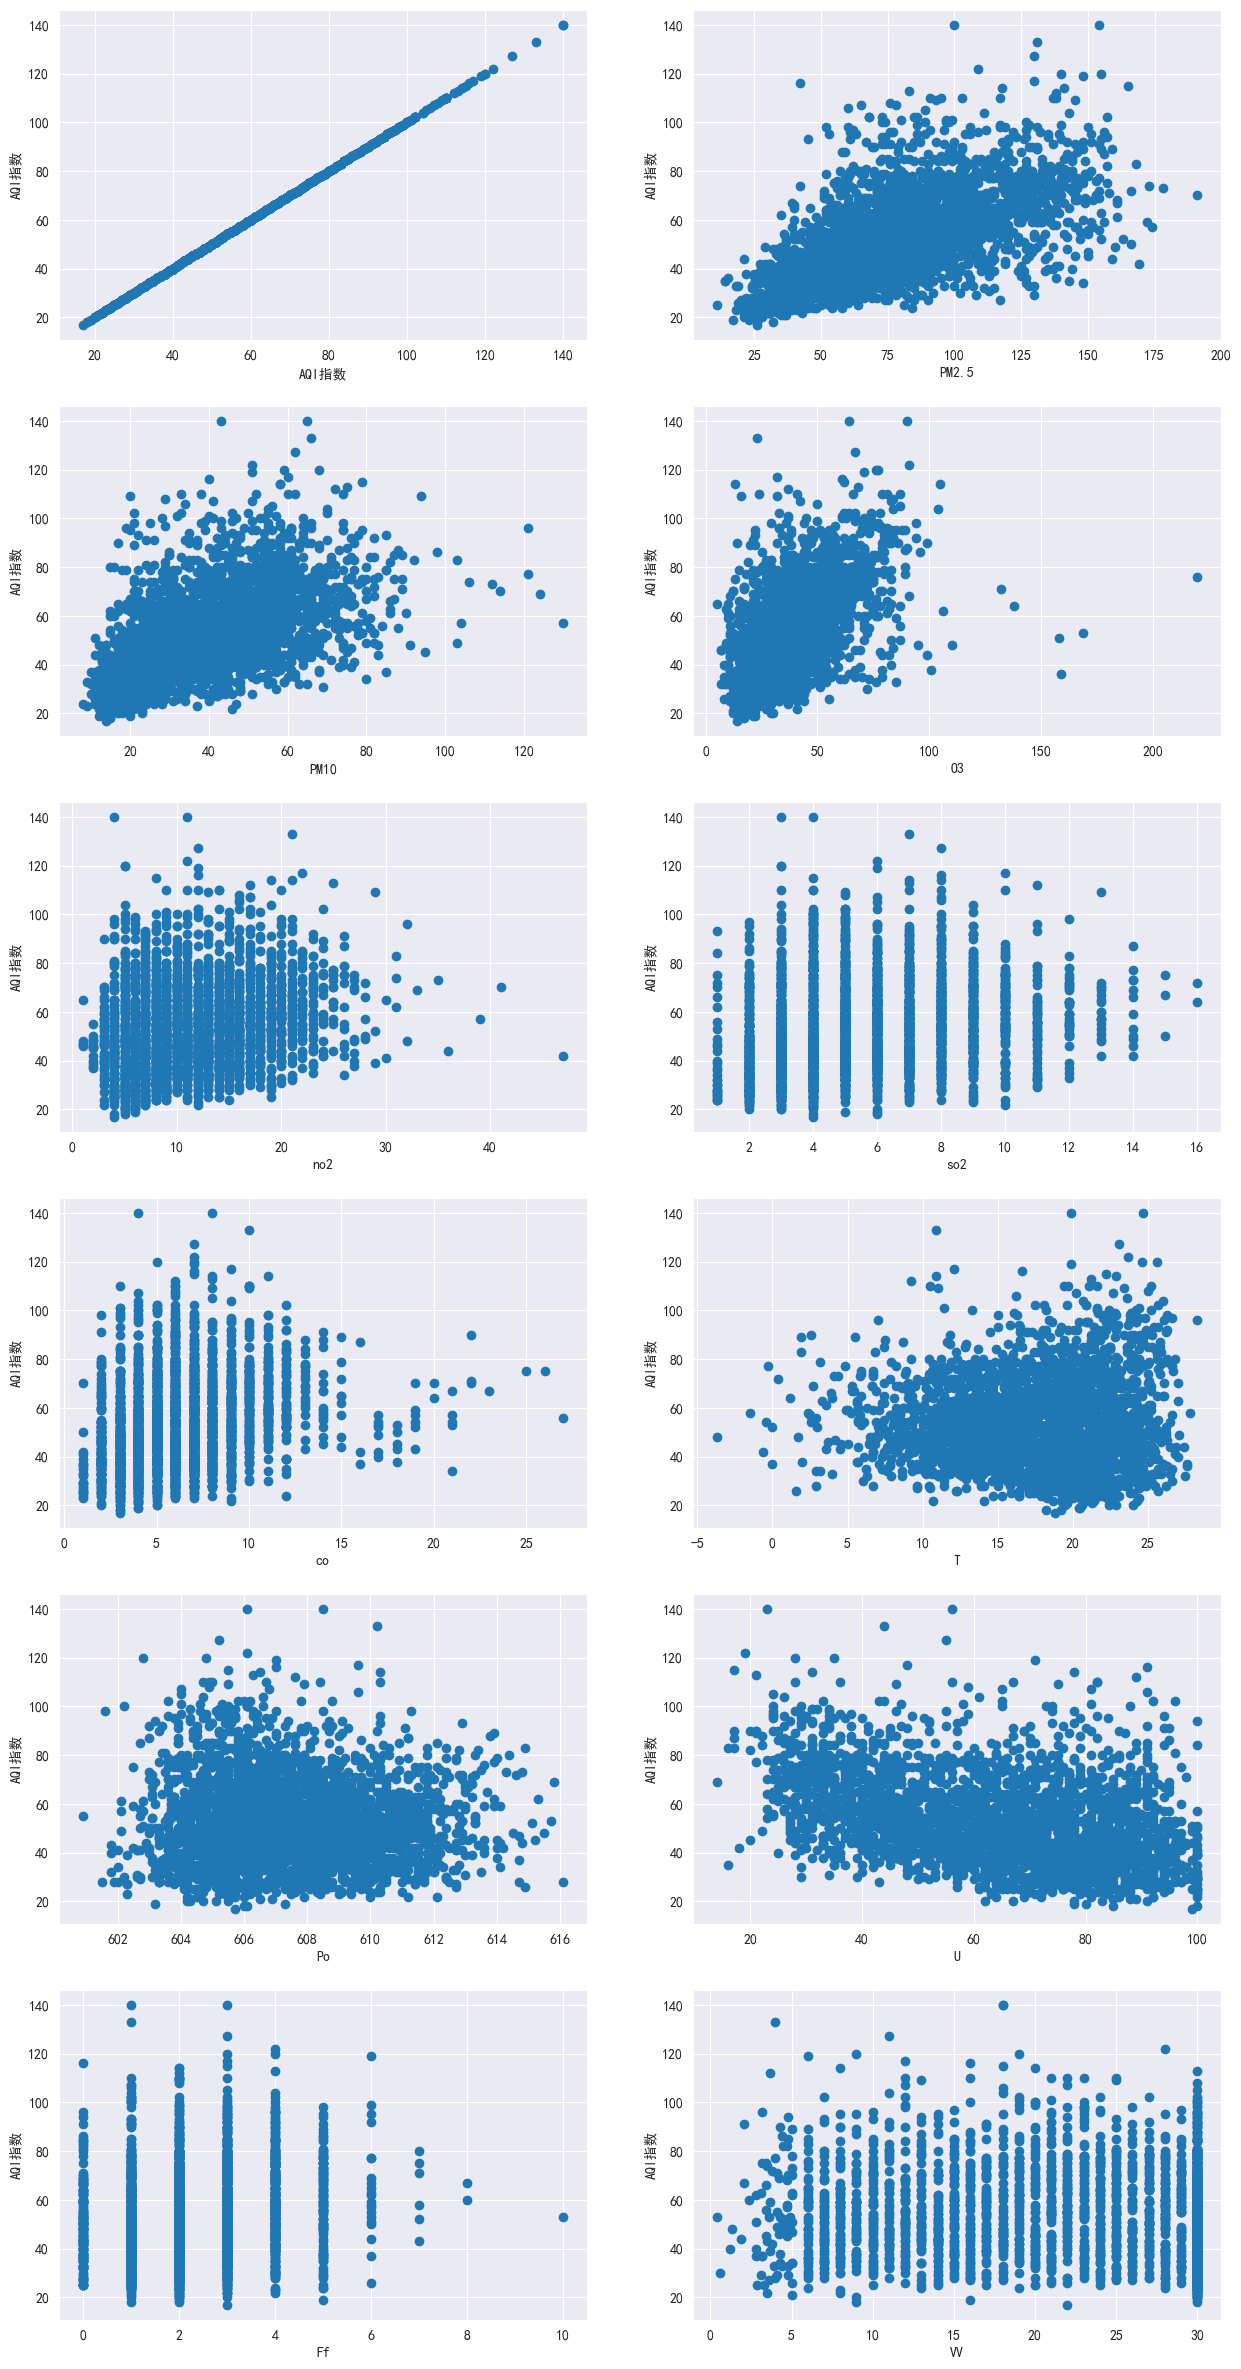

In [4]:
# 绘制散点图
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15,30))

# 遍历每一对特征，并绘制散点图
for i, feature in enumerate(data.columns[1:]):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(data[feature], data['AQI指数'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('AQI指数')

# 显示图像
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

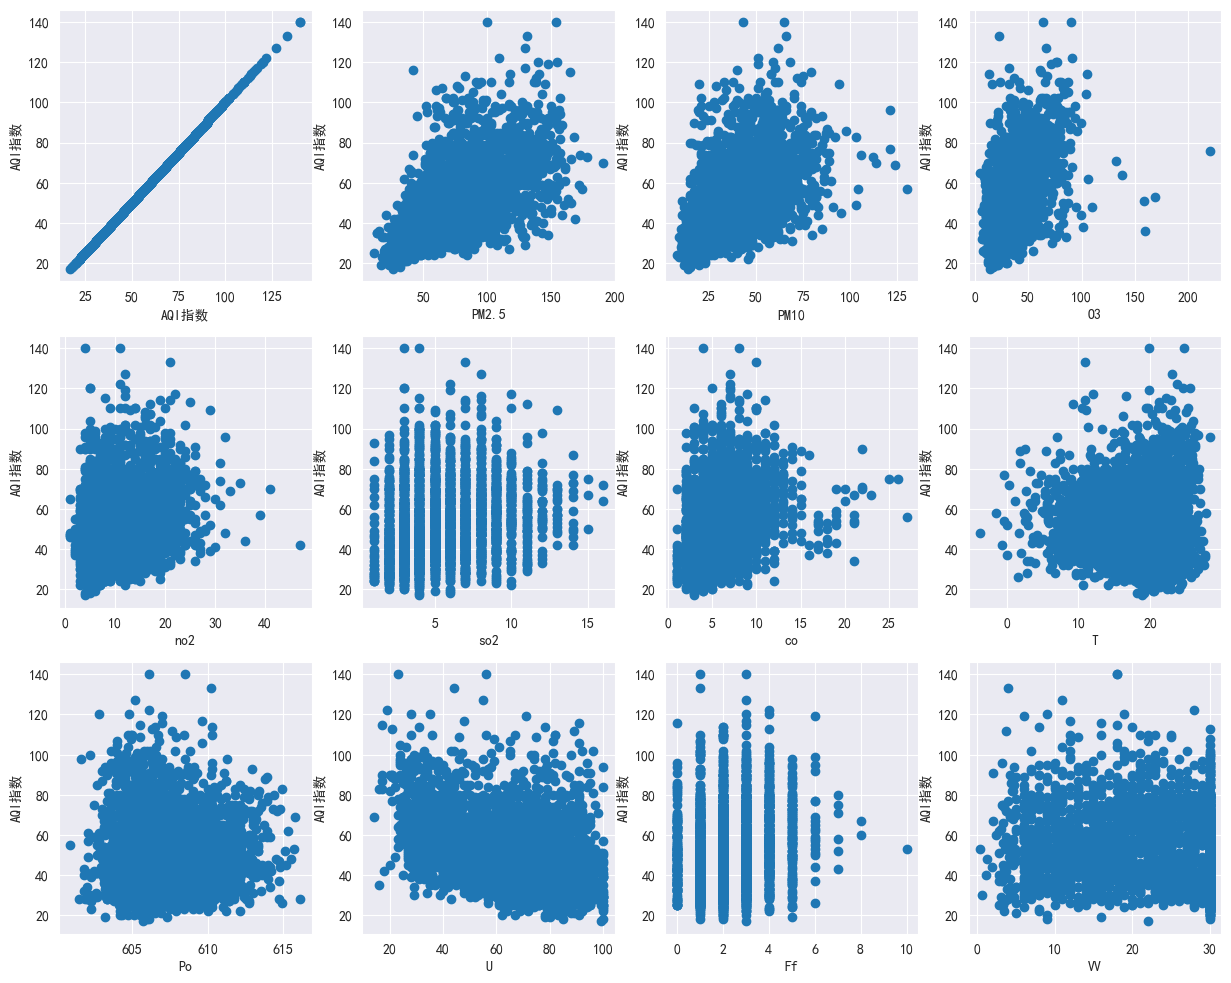

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
 # 遍历每一对特征，并绘制散点图
for i, feature in enumerate(data.columns[1:]):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(data[feature], data['AQI指数'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('AQI指数')
 # 显示图像
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

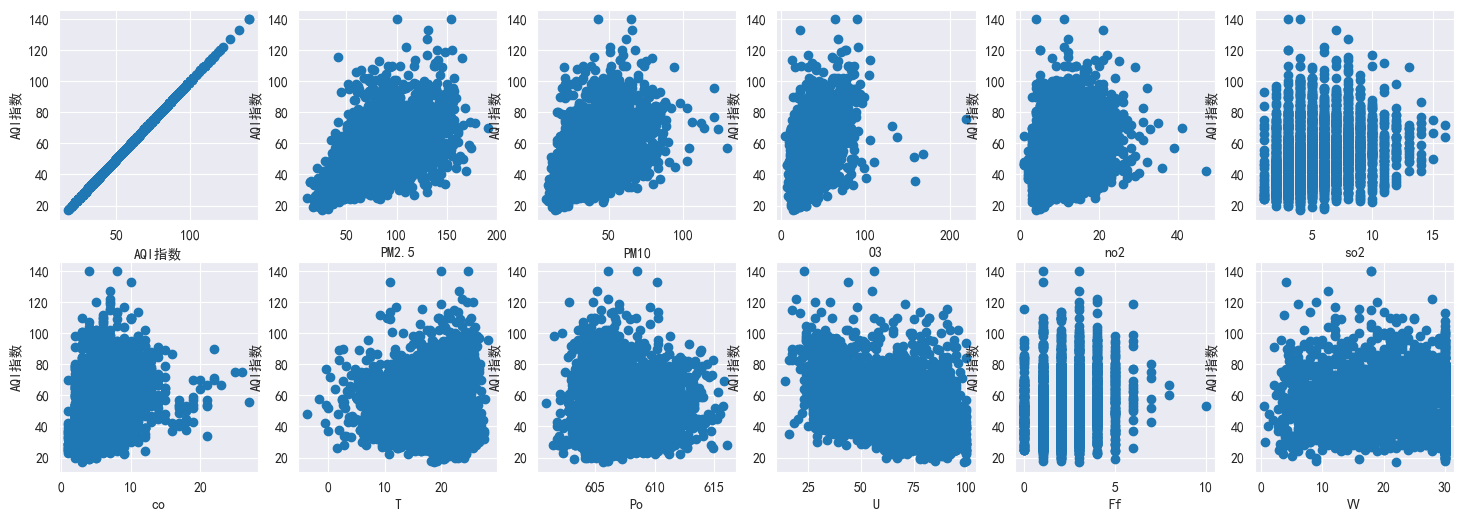

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(18, 6))
 # 遍历每一对特征，并绘制散点图
for i, feature in enumerate(data.columns[1:]):
    row = i // 6
    col = i % 6
    axs[row, col].scatter(data[feature], data['AQI指数'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('AQI指数')
# 显示图像
plt.show()

In [7]:
 # 提取AQI指数和其他要素的列
cols_to_plot = ['AQI指数', 'PM2.5', 'PM10', 'O3', 'no2', 'so2', 'co', 'T', 'Po', 'U', 'Ff', 'VV', 'RRR']
data_to_plot = data[cols_to_plot]
 # 将日期列转换为日期格式，提取季节信息
data_to_plot['date'] = pd.to_datetime(data['date'])
data_to_plot['season'] = data_to_plot['date'].dt.quarter
 # 计算不同季节AQI指数与其他要素的相关系数
for season in range(1, 5):
    season_data = data_to_plot[data_to_plot['season'] == season]
    print("Season ", season)
    for col in cols_to_plot:
        if col != 'AQI指数':
            corr = np.corrcoef(season_data['AQI指数'], season_data[col])[0, 1]
            print(col, " Correlation: ", corr)

Season  1
PM2.5  Correlation:  0.641280748555165
PM10  Correlation:  0.5505801349874399
O3  Correlation:  0.5332352058840559
no2  Correlation:  0.184400506569053
so2  Correlation:  0.15261475128253948
co  Correlation:  0.2673419169861564
T  Correlation:  0.38593266022831724
Po  Correlation:  -0.1984285368447955
U  Correlation:  -0.23811987894533346
Ff  Correlation:  0.13041014572353232
VV  Correlation:  -0.2500075833357175
RRR  Correlation:  -0.10564830432778229
Season  2
PM2.5  Correlation:  0.6161342929308478
PM10  Correlation:  0.49463277169719266
O3  Correlation:  0.6283133118173434
no2  Correlation:  0.15218505129368953
so2  Correlation:  0.032103837668179196
co  Correlation:  0.11910454156232
T  Correlation:  0.051168500866955166
Po  Correlation:  0.12600853484834357
U  Correlation:  -0.4923078817049232
Ff  Correlation:  0.17689109587933502
VV  Correlation:  -0.06816454342130429
RRR  Correlation:  -0.1301507962757121
Season  3
PM2.5  Correlation:  0.4371973428610033
PM10  Correla

In [8]:
 # 提取AQI指数和其他要素的列
cols_to_plot = ['AQI指数', 'PM2.5', 'PM10', 'O3', 'no2', 'so2', 'co', 'T', 'Po', 'U', 'Ff', 'VV', 'RRR']
data_to_plot = data[cols_to_plot]
 # 将日期列转换为日期格式，提取季节信息
data_to_plot['date'] = pd.to_datetime(data['date'])
data_to_plot['season'] = pd.Series(data_to_plot['date'].dt.quarter)
 # 创建一个空的DataFrame，用于存储相关系数
corr_df = pd.DataFrame(columns=cols_to_plot)
 # 计算不同季节AQI指数与其他要素的相关系数
for season in range(1, 5):
    season_data = data_to_plot[data_to_plot['season'] == season]
    curr_row = pd.Series({'Season': season})
    for col in cols_to_plot:
        if col != 'AQI指数':
            corr = np.corrcoef(season_data['AQI指数'], season_data[col])[0, 1]
            curr_row[col] = corr
    corr_df = corr_df.append(curr_row, ignore_index=True)
 # 将结果保存至表格
corr_df.to_csv('数据分析/seasonal_AQI_correlations.csv', index=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17196\3202411798.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(curr_row, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17196\3202411798.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(curr_row, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17196\3202411798.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(curr_row, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17196\3202411798.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste